# WeatherPy
----
Andrew Anastasiades | @andrew-ana

## Initialize

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

605


## Perform API Calls

In [143]:
print("Beginning API Calls")
print("------------------------")

url = "http://api.openweathermap.org/data/2.5/weather"

#The API says we can do 60 calls a minute. I didn't have that issue, but I don't want to get pinged for that
#So you are going to have to wait. But I will try to optimize wait time <3
begin = time.time()

#Create empty DataFrame
weather_df = pd.DataFrame(columns=["City", "Response Code", "Exec Time(s)","Longitude","Latitude",
                                  "Weather", "Temperature (F)","Cloudiness (%)","Wind Speed (mph)", "Humidity (%)" ])
i = 1

#ITERATE THROUGH CITIES
for city in cities:
    call_start = time.time()#Time each api call
    response = requests.get(url, params={'q': city, 'appid': weather_api_key, 'units':'imperial'})
    if response.status_code == 200:
        print(f"{i}. {city}: Results Found! {time.time()-call_start:.3f}s")
    else:
        print(f"{i}. {city}: Results not Found :( {time.time()-call_start:.3f}s")
    
    #EXTRACT VALUES FROM RESPONSE
    #LONGITUDE
    try:
        lon = response.json()["coord"]["lon"]
    except:
        lon = np.nan
    #LATITUDE
    try:
        lat = response.json()["coord"]["lat"]
    except:
        lat = np.nan
    #WEATHER
    try:
        weather = response.json()['weather'][0]['main']
    except:
        weather = ""
    #TEMPERATURE
    try:
        temp = response.json()['main']['temp_max']
    except:
        temp = np.nan
    #CLOUDINESS
    try:
        clouds = response.json()['clouds']['all']
    except:
        clouds = np.nan
    #WIND SPEED
    try:
        wind_speed = response.json()['wind']['speed']
    except:
        wind_speed = np.nan
    try:
        humidity = response.json()['main']['humidity']
    except:
        wind_speed = np.nan
    
    #APPEND ROW TO DF
    weather_df = weather_df.append({
        "City": city, 
        "Response Code": response.status_code, 
        "Exec Time(s)": time.time()-call_start,
        "Latitude" : lat,
        "Longitude" : lon,
        "Weather" : weather,
        "Cloudiness (%)" : clouds,
        "Temperature (F)" : temp,
        "Wind Speed (mph)" : wind_speed,
        "Humidity (%)" : humidity,
        
    }, ignore_index=True)
    
    #increment counter
    i += 1 
    #Check if we need to sleep!
    if i % 60 == 0:
        current = time.time() - begin
        wait_time = 60*(i//60)-current
        print(f"Executed 60 calls, waiting for {wait_time:.2f} seconds")
        time.sleep(wait_time)
        
print(f"Total Execution: {time.time()-begin}s")
# Save the DataFrame
weather_df.to_csv("Output/cities.csv")

Beginning API Calls
------------------------
1. tuktoyaktuk: Results Found! 0.140s
2. aklavik: Results Found! 0.074s
3. caravelas: Results Found! 0.071s
4. kapaa: Results Found! 0.173s
5. severo-kurilsk: Results Found! 0.098s
6. aswan: Results Found! 0.073s
7. petropavlovsk-kamchatskiy: Results Found! 0.103s
8. bengkulu: Results Found! 0.289s
9. illoqqortoormiut: Results not Found :( 0.075s
10. yueyang: Results Found! 0.084s
11. fevralsk: Results not Found :( 0.104s
12. tura: Results Found! 0.166s
13. torbay: Results Found! 0.077s
14. mazatlan: Results Found! 0.118s
15. hobart: Results Found! 0.073s
16. thompson: Results Found! 0.266s
17. ushuaia: Results Found! 0.090s
18. busselton: Results Found! 0.070s
19. bluff: Results Found! 0.072s
20. chuy: Results Found! 0.169s
21. mataura: Results Found! 0.328s
22. cape town: Results Found! 0.303s
23. hilo: Results Found! 0.071s
24. new norfolk: Results Found! 0.100s
25. touros: Results Found! 0.148s
26. vaini: Results Found! 0.075s
27. jamest

215. ambilobe: Results Found! 0.496s
216. saldanha: Results Found! 0.151s
217. tshikapa: Results Found! 0.272s
218. cravo norte: Results Found! 0.320s
219. bavly: Results Found! 0.281s
220. chadiza: Results Found! 0.363s
221. sevenoaks: Results Found! 0.107s
222. oban: Results Found! 0.529s
223. roma: Results Found! 0.144s
224. sisimiut: Results Found! 0.279s
225. shihezi: Results Found! 0.320s
226. lebu: Results Found! 0.090s
227. merauke: Results Found! 0.284s
228. avera: Results Found! 0.073s
229. paamiut: Results Found! 0.274s
230. goderich: Results Found! 0.278s
231. aykhal: Results Found! 0.269s
232. praia da vitoria: Results Found! 0.334s
233. eureka: Results Found! 0.075s
234. vestmannaeyjar: Results Found! 0.071s
235. santiago del estero: Results Found! 0.477s
236. mayumba: Results Found! 0.151s
237. coihaique: Results Found! 0.071s
238. san roque: Results Found! 0.270s
239. yarada: Results Found! 0.316s
Executed 60 calls, waiting for 44.88 seconds
240. amderma: Results not Fo

426. eirunepe: Results Found! 0.506s
427. beeville: Results Found! 0.344s
428. kangasala: Results Found! 0.407s
429. abu kamal: Results Found! 0.383s
430. urumqi: Results Found! 0.294s
431. port antonio: Results Found! 0.342s
432. flin flon: Results Found! 0.273s
433. port-gentil: Results Found! 0.187s
434. camacha: Results Found! 0.097s
435. roebourne: Results Found! 0.448s
436. moindou: Results Found! 0.294s
437. cayeli: Results Found! 0.213s
438. gardan diwal: Results not Found :( 0.079s
439. buqayq: Results not Found :( 0.073s
440. kulhudhuffushi: Results Found! 0.344s
441. eldorado: Results Found! 0.278s
442. estreito: Results Found! 0.355s
443. aleysk: Results Found! 0.378s
444. fortuna: Results Found! 0.092s
445. sistranda: Results Found! 0.078s
446. sumenep: Results Found! 0.288s
447. auki: Results Found! 0.075s
448. hambantota: Results Found! 0.073s
449. rawannawi: Results not Found :( 0.072s
450. yamada: Results Found! 0.293s
451. muroto: Results Found! 0.274s
452. saint anth

## Inspect the Data

In [50]:
weather_df

,City,Response Code,Exec Time(s),Longitude,Latitude,Weather,Temperature (F),Cloudiness (%),Wind Speed (mph),Humidity (%)
0,tuktoyaktuk,200,0.379629,-133.0374,69.4541,Mist,14,90,5.75,92
1,aklavik,200,0.400749,-135.0107,68.2191,Snow,26.6,90,9.22,74
2,caravelas,200,0.272465,-39.2481,-17.7125,Clouds,74.16,79,9.26,70
3,kapaa,200,0.277769,-159.3190,22.0752,Clouds,79.14,40,12.66,69
4,severo-kurilsk,200,0.478854,156.1250,50.6789,Snow,35.67,100,23.20,97
...,...,...,...,...,...,...,...,...,...,...
600,condado,200,0.348705,-79.8403,21.8767,Clouds,86.58,100,9.22,70
601,nelson bay,200,0.379025,152.1500,-32.7167,Clouds,55.27,68,5.77,100
602,brigantine,200,0.378560,-74.3646,39.4101,Clear,66.97,1,12.66,19
603,hokitika,200,0.270262,170.9667,-42.7167,Clouds,53.37,33,2.82,73


In [69]:
weather_df.describe()

,Exec Time(s),Longitude,Latitude,Wind Speed (mph)
count,605.000000,559.000000,559.000000,559.000000
mean,0.335224,14.736987,20.114588,7.781503
std,0.154304,90.344737,33.709138,5.615736
min,0.070046,-175.200000,-54.800000,0.110000
25%,0.277170,-64.009150,-8.753100,3.635000
50%,0.334946,16.433300,24.093400,5.970000
75%,0.386454,87.791900,48.736250,10.360000
max,1.814944,179.316700,78.218600,37.980000


## Visualize Relationships

###  Temperature (F) vs. Latitude

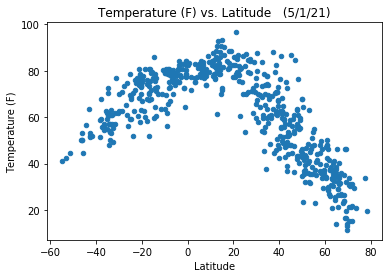

In [75]:
weather_df.plot(x="Latitude",y="Temperature (F)", kind="scatter", title="Temperature (F) vs. Latitude   (5/1/21)")
plt.savefig("Output/Global_Temperature_vs_Latitude.png")
plt.show()

#### Observations
- Predictably, temperature is higher at the equator (Lat=0) than it is near the poles.
- The data is skewed toward the +Lats because it is spring in the Northern Hemisphere

### Humidity (%) vs. Latitude

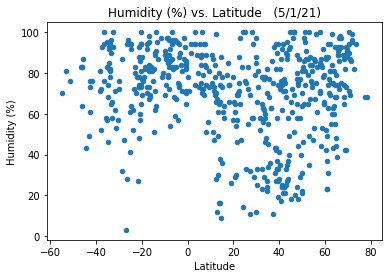

In [76]:
weather_df.plot(x="Latitude",y="Humidity (%)", kind="scatter", title = "Humidity (%) vs. Latitude   (5/1/21)")
plt.savefig("Output/Global_Humidity_vs_Latitude.png")
plt.show()

#### Observations
- It seems like humidity globally tends to be above 40-50%, with the majority of exceptions occurring in the Northern Hemisphere
- However, because this code has been executed during spring, we might expect different distributions during other months

### Cloudiness (%) vs. Latitude

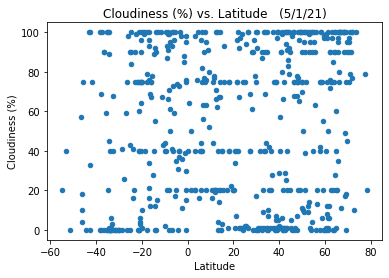

In [77]:
weather_df.plot(x="Latitude",y="Cloudiness (%)", kind="scatter", title = "Cloudiness (%) vs. Latitude   (5/1/21)")
plt.savefig("Output/Global_Cloudiness_vs_Latitude.png")
plt.show()

#### Observations
- Latitude seems to have no effect on Cloud Coverage, but
- Cloudiness is clustered around multiples of 20. Presumably this is due to data recording practices

### Wind Speed (mph) vs. Latitude

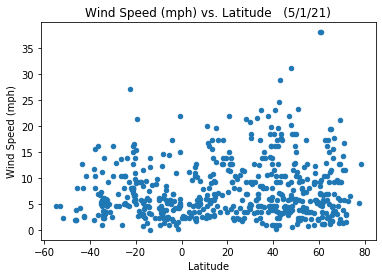

In [78]:
weather_df.plot(x="Latitude",y="Wind Speed (mph)", kind="scatter", title = "Wind Speed (mph) vs. Latitude   (5/1/21)")
plt.savefig("Output/Global_WindSpeed_vs_Latitude.png")
plt.show()

#### Observations
- There does not seem to be a strong correlation between wind speed and latitude

## Regression Analysis

In [88]:
# Create Dataframe for Northern Hemisphere
north = weather_df[weather_df["Latitude"]>=0]
north

,City,Response Code,Exec Time(s),Longitude,Latitude,Weather,Temperature (F),Cloudiness (%),Wind Speed (mph),Humidity (%)
0,tuktoyaktuk,200,0.379629,-133.0374,69.4541,Mist,14,90,5.75,92
1,aklavik,200,0.400749,-135.0107,68.2191,Snow,26.6,90,9.22,74
3,kapaa,200,0.277769,-159.3190,22.0752,Clouds,79.14,40,12.66,69
4,severo-kurilsk,200,0.478854,156.1250,50.6789,Snow,35.67,100,23.20,97
5,aswan,200,0.352355,32.9070,24.0934,Clear,86.38,0,9.82,14
...,...,...,...,...,...,...,...,...,...,...
597,amberley,200,0.294196,-84.4280,39.2048,Clear,71.04,1,16.11,33
599,esso,200,0.273335,158.7000,55.9333,Clouds,35.1,100,5.57,99
600,condado,200,0.348705,-79.8403,21.8767,Clouds,86.58,100,9.22,70
602,brigantine,200,0.378560,-74.3646,39.4101,Clear,66.97,1,12.66,19


In [89]:
# Create Dataframe for Southern Hemisphere
south = weather_df[weather_df["Latitude"]<0]
south

,City,Response Code,Exec Time(s),Longitude,Latitude,Weather,Temperature (F),Cloudiness (%),Wind Speed (mph),Humidity (%)
2,caravelas,200,0.272465,-39.2481,-17.7125,Clouds,74.16,79,9.26,70
7,bengkulu,200,0.110521,102.2655,-3.8004,Clouds,75.15,73,3.96,88
14,hobart,200,0.299119,147.3294,-42.8794,Clear,51.53,0,8.05,76
16,ushuaia,200,0.386284,-68.3000,-54.8000,Clouds,41,20,4.61,70
17,busselton,200,0.295580,115.3333,-33.6500,Clear,53.17,6,3.11,96
...,...,...,...,...,...,...,...,...,...,...
589,puerto baquerizo moreno,200,0.548265,-89.6000,-0.9000,Clouds,84.2,20,14.97,70
591,talcahuano,200,0.328368,-73.1167,-36.7167,Clouds,57.2,90,6.91,94
598,dekar,200,0.331317,21.9333,-21.5333,Clear,60.37,0,7.78,27
601,nelson bay,200,0.379025,152.1500,-32.7167,Clouds,55.27,68,5.77,100


###  Temperature (F) vs. Latitude

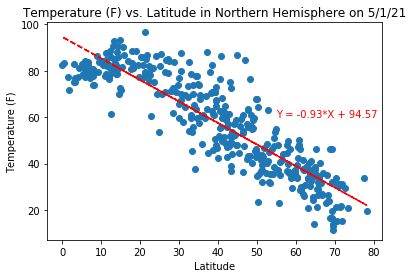

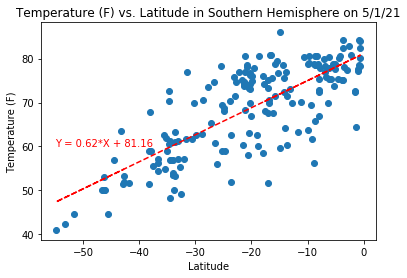

In [127]:
xlabel = "Latitude"
ylabel = "Temperature (F)"


#North
hemi = "Northern Hemisphere"
X=north[xlabel].astype(float)
Y=north[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=55, y=60 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()


#South
hemi = "Southern Hemisphere"
X=south[xlabel].astype(float)
Y=south[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=-55, y=60 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()

#### Observations
- The two lines are nice approximate inverses of each other
- My guess is that at a solstice the slopes are actually perpendicular

###  Humidity (%) vs. Latitude

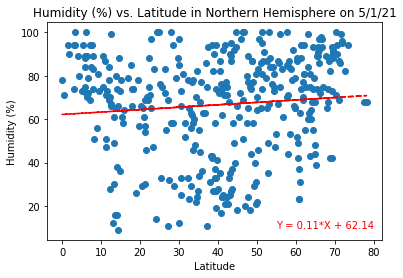

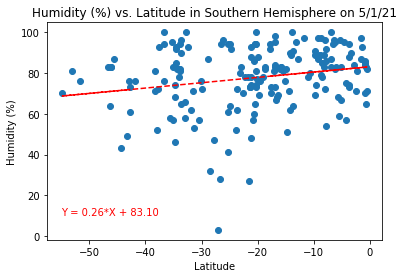

In [129]:
xlabel = "Latitude"
ylabel = "Humidity (%)"


#North
hemi = "Northern Hemisphere"
X=north[xlabel].astype(float)
Y=north[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=55, y=10 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()


#South
hemi = "Southern Hemisphere"
X=south[xlabel].astype(float)
Y=south[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=-55, y=10 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()

#### Observations
- The two lines have small, positive, and approximately equal slope. This tells me that there is a small humidity preference for the northern hemisphere.
- And yet, the spread in the northern hemisphere is higher. I suspect that would be meaningful to a meteorologist, but I cannot speculate on the mechanism behind any culprit

###  Cloudiness (%) vs. Latitude

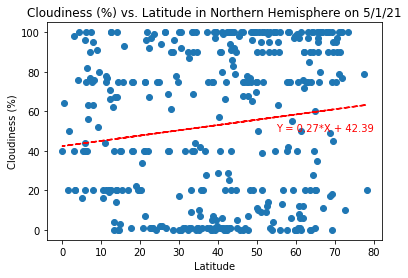

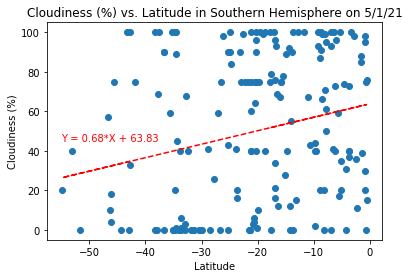

In [132]:
xlabel = "Latitude"
ylabel = "Cloudiness (%)"


#North
hemi = "Northern Hemisphere"
X=north[xlabel].astype(float)
Y=north[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=55, y=50 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()


#South
hemi = "Southern Hemisphere"
X=south[xlabel].astype(float)
Y=south[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=-55, y=45 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()

#### Observations
- I really don't think the data matches the regression line at all. These charts are meaningless.

###  Wind Speed (mph) vs. Latitude

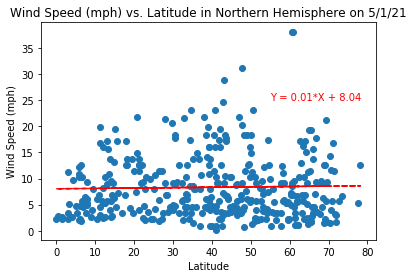

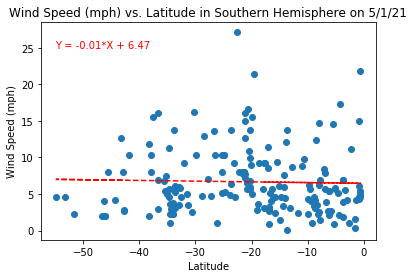

In [135]:
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"


#North
hemi = "Northern Hemisphere"
X=north[xlabel].astype(float)
Y=north[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=55, y=25 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()


#South
hemi = "Southern Hemisphere"
X=south[xlabel].astype(float)
Y=south[ylabel].astype(float)

plt.scatter(x=X,y=Y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"{ylabel} vs. {xlabel} in {hemi} on 5/1/21")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, "r--")
plt.text(x=-55, y=25 , s=f"Y = {m:.2f}*X + {b:.2f}", fontdict= {'color':'red'})

plt.savefig(f"Output/{hemi}_{ylabel}_vs_{xlabel}.png")
plt.show()

#### Observations
- Once again, there is no correlation. But this time the slope is effectively 0, so even stronger evidence.